# RDS Homework 2 Problem 4 Template
## Spring 2025


In [1]:
!pip install -U shap

In [2]:
from __future__ import print_function

import shap
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.ensemble
import sklearn.metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tqdm
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import fetch_20newsgroups
from collections import defaultdict
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Configs
np.random.seed(1)
shap.initjs()
sns.set_style("whitegrid")

plot_shap=True # NOTE: Turn False to disable shap plots as they can be slow to load

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Problem 3

### Part (A)

In [3]:
# Mark the categories of interest
categories = ['alt.atheism', 'soc.religion.christian']

# Fetch the data
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

# Set outcome class names
class_names = ['atheism', 'christian'] #0->atheist, 1->christian

In [4]:
# Initialize & fit tf-idf vectorizer
vectorizer = TfidfVectorizer(min_df=10) # Ignore words that appear in < 10 newsgroup documents
X_train = vectorizer.fit_transform(newsgroups_train.data)
# X_train
X_test = vectorizer.transform(newsgroups_test.data)
y_train=newsgroups_train.target
# y_train.shape
y_test=newsgroups_test.target
# y_test.shape

In [5]:
# Train & fit the classifier
model = SGDClassifier(penalty="l2", loss="log_loss", random_state=42)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [6]:
y_pred[:10]

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 0])

### Part (B)

In [7]:
# Confusion Matrix
conf_matrix=sklearn.metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_matrix

array([[272,  47],
       [  9, 389]])

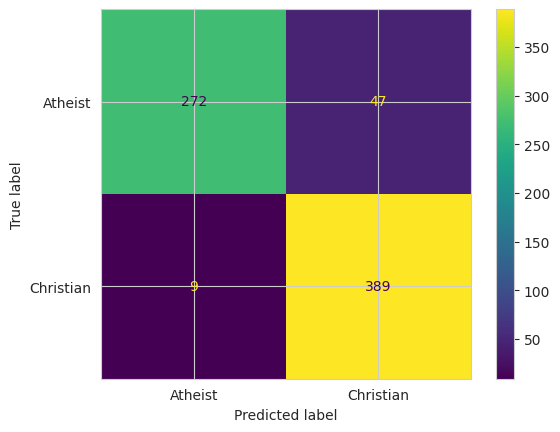

In [8]:
disp=sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Atheist", "Christian"])
disp.plot()
# plt.show()

#### Explainer

In [9]:
# Initialize the explainer and apply to test data
explainer = shap.LinearExplainer(model, X_train)
# Apply it to the test data
shap_values = explainer.shap_values(X_test)
print(shap_values[:5])

[[-0.00266663  0.01217634 -0.00608969 ...  0.00126406 -0.00027631
  -0.        ]
 [-0.00266663  0.01217634 -0.00608969 ...  0.00126406 -0.00027631
  -0.        ]
 [-0.00266663  0.01217634 -0.00608969 ...  0.00126406 -0.00027631
  -0.        ]
 [-0.00266663  0.01217634 -0.00608969 ...  0.00126406 -0.00027631
  -0.        ]
 [-0.00266663  0.01217634 -0.00608969 ...  0.00126406 -0.00027631
  -0.        ]]


<ipython-input-10-c58718237a5a>:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_array, feature_names=vectorizer.get_feature_names_out(), max_display=50


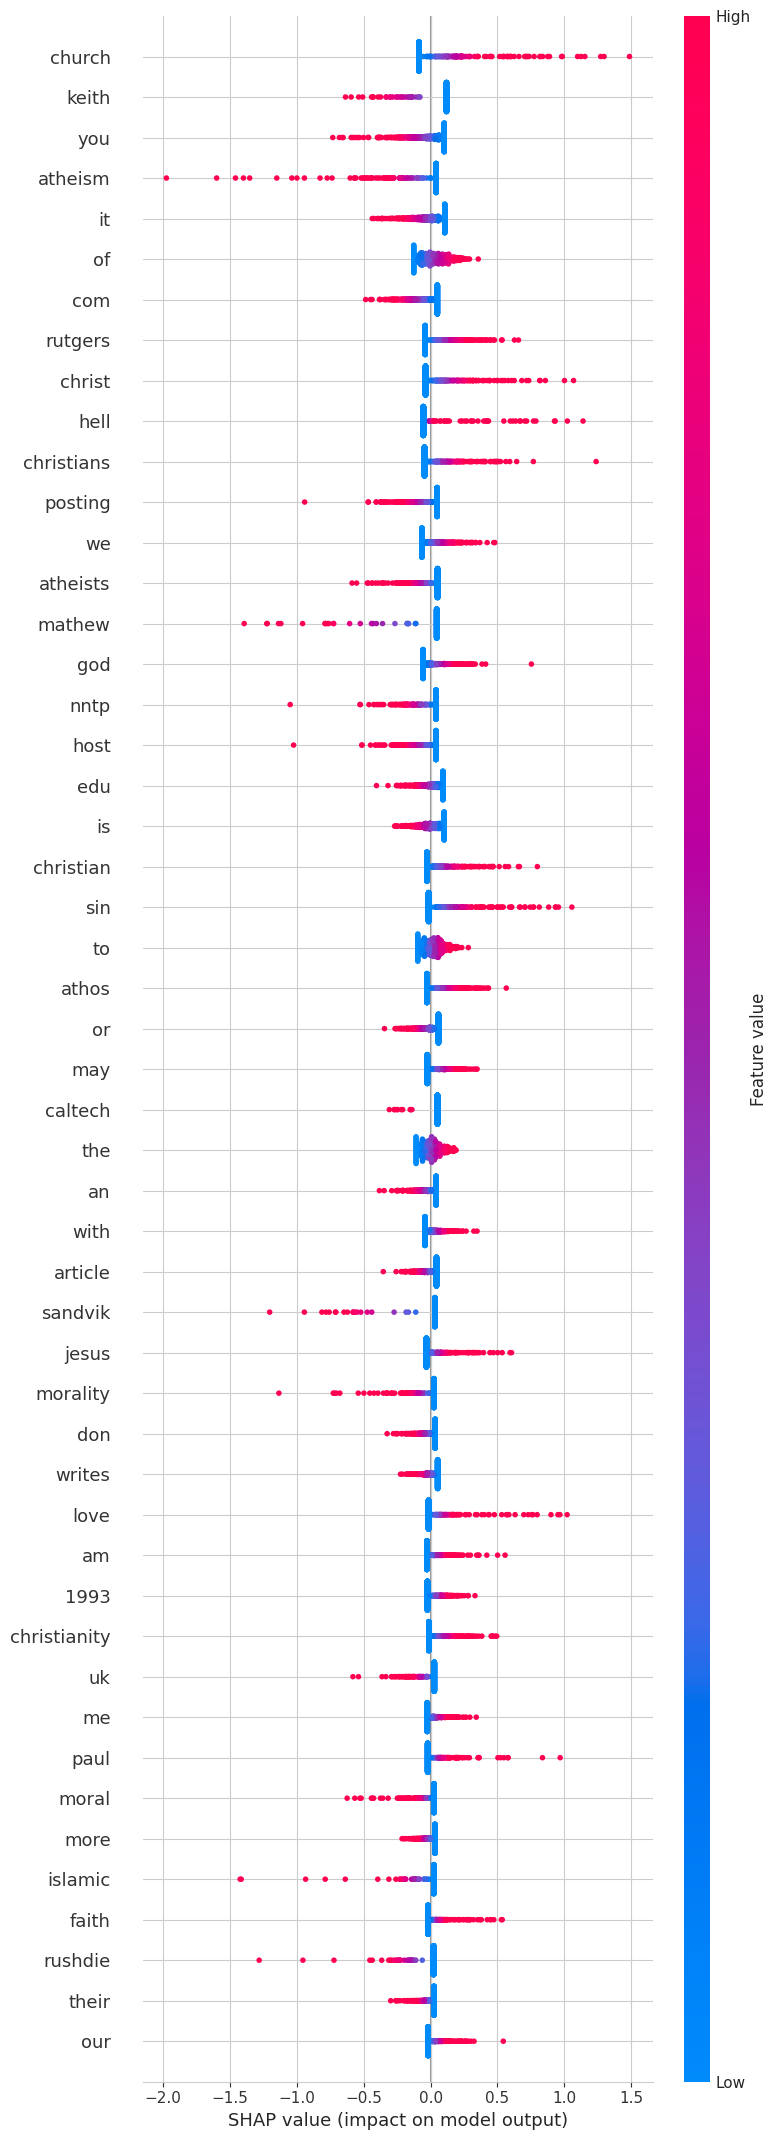

In [10]:
X_test_array = X_test.toarray() # We need to provide the data in dense format, not sparse
shap.summary_plot(shap_values, X_test_array, feature_names=vectorizer.get_feature_names_out(), max_display=50
)

In [11]:
# Select 5 documents in the test set for explanation
# j=0
# idx=[]
# for i in range (717):
#   if (y_test[i] != y_pred[i]):
#     idx.append(i)
#     j+=1
#   # if j>=5:
#   #   break
# print(idx)

# j=0
# idx=[]
for i in range (717):
  if (y_test[i] == y_pred[i] and y_test[i]==0):
    print(i)
    break
    # j+=1
  # if j>=5:
  #   break
# print(idx)

2


In [12]:
# Visually explain 5 documents selected from the test set

In [13]:
# shap.initjs()

Correct: Christian
Classified: Christian
----------------------
From: crackle!dabbott@munnari.oz.au (NAME)
Subject: "Why I am not Bertrand Russell" (2nd request)
Reply-To: dabbott@augean.eleceng.adelaide.edu.au (Derek Abbott)
Organization: Electrical & Electronic Eng., University of Adelaide
Lines: 4

Could the guy who wrote the article "Why I am not Bertrand Russell"
resend me a copy?

Sorry, I accidently deleted my copy and forgot your name.



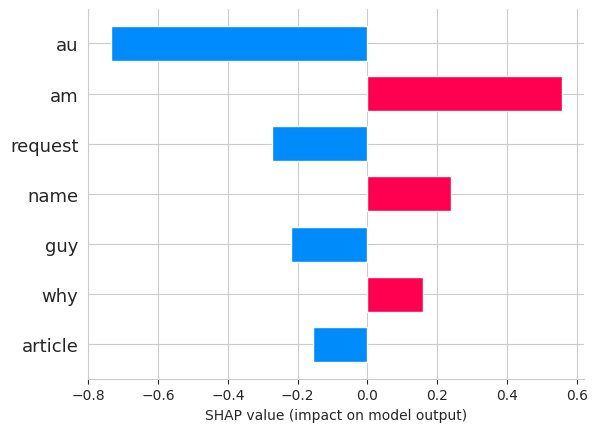

In [14]:
shap.initjs()
idx = 0
print("Correct:", "Christian" if y_test[idx] else "Atheist")
print("Classified:", "Christian" if y_pred[idx] else "Atheist")
print("----------------------")
print(newsgroups_test.data[idx])
shap.bar_plot(shap_values[idx,:], feature_names=vectorizer.get_feature_names_out())

# shap.force_plot(
#     explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
#     feature_names=vectorizer.get_feature_names_out()
#   )

In [15]:
# feature_names[0]

Correct: Christian
Classified: Atheist
----------------------
From: tdarcos@access.digex.net (Paul Robinson)
Subject: Homosexuality is Immoral (non-religious argument)
Organization: Tansin A. Darcos & Company, Silver Spring, MD USA
Lines: 43

[This was crossposted to a zillion groups.  I don't intend to
carry an entire discussion crossposted from alt.sex, particularly
one whose motivation seems to be having a fun argument.  However
I thought readers might be interested to know about the
discussion there.  --clh]

I intend to endeavor to make the argument that homosexuality is an
immoral practice or lifestyle or whatever you call it.  I intend to
show that there is a basis for a rational declaration of this
statement.  I intend to also show that such a declaration can be 
made without there being a religious justification for morality,
in fact to show that such a standard can be made if one is an atheist.

Anyone who wants to join in on the fun in taking the other side,
i.e. that they c

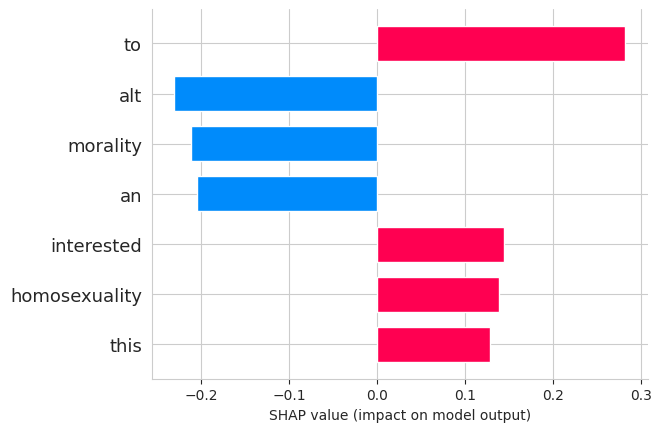

In [16]:
shap.initjs()
idx = 1
print("Correct:", "Christian" if y_test[idx] else "Atheist")
print("Classified:", "Christian" if y_pred[idx] else "Atheist")
print("----------------------")
print(newsgroups_test.data[idx])
shap.bar_plot(shap_values[idx,:], feature_names=vectorizer.get_feature_names_out())

# shap.force_plot(
#     explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
#     feature_names=vectorizer.get_feature_names_out()
#   )


Correct: Atheist
Classified: Atheist
----------------------
From: madhaus@netcom.com (Maddi Hausmann)
Subject: Re: Amusing atheists and agnostics
Organization: Society for Putting Things on Top of Other Things
Lines: 26

timmbake@mcl.ucsb.edu ("Half" Bake Timmons) writes: >
Maddi: >>

>>Whirr click whirr...Frank O'Dwyer might also be contained
>>in that shell...pop stack to determine...whirr...click..whirr
>
>>"Killfile" Keith Allen Schneider = Frank "Closet Theist" O'Dwyer = ...

>= Maddi "The Mad Sound-O-Geek" Hausmann

No, no, no!  I've already been named by "Killfile" Keith.
My nickname is Maddi "Never a Useful Post" Hausmann, and
don't you DARE forget it, "Half".

>-- "...there's nothing higher, stronger, more wholesome and more useful in life
>than some good memory..." -- Alyosha in Brothers Karamazov (Dostoevsky)

You really should quote Ivan Karamazov instead(on a.a), as he was
the atheist.

-- 
Maddi Hausmann                       madhaus@netcom.com
Centigram Communications Co

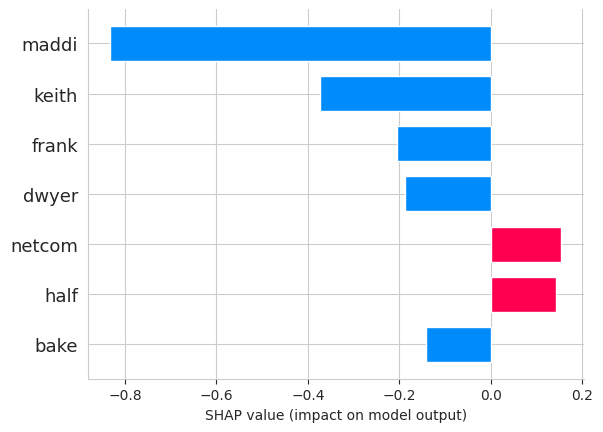

In [17]:
shap.initjs()
idx = 2
print("Correct:", "Christian" if y_test[idx] else "Atheist")
print("Classified:", "Christian" if y_pred[idx] else "Atheist")
print("----------------------")
print(newsgroups_test.data[idx])
shap.bar_plot(shap_values[idx,:], feature_names=vectorizer.get_feature_names_out())

# shap.force_plot(
#     explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
#     feature_names=vectorizer.get_feature_names_out()
#   )

Correct: Atheist
Classified: Christian
----------------------
From: aaron@minster.york.ac.uk
Subject: Re: Gulf War / Selling Arms
Distribution: world
Organization: Department of Computer Science, University of York, England
Lines: 14

Mark McCullough (mccullou@snake10.cs.wisc.edu) wrote:
: I heard about the arms sale to Saudi Arabia.  Now, how is it such a grave
: mistake to sell Saudi Arabia weapons?  Or are you claiming that we shouldn't
: sell any weapons to other countries?  Straightforward answer please.

Saudi Arabia is an oppressive regime that has been recently interfering
in the politcs of newly renunified Yemen, including assasinations and 
border incursions. It is entirely possible that they will soon invade.
Unluckily for Yemen it is not popular in the West as they managed to put
aside political differences during reunification and thus the West has
effectively lost one half (North?) as a client state.

		Aaron Turner
 



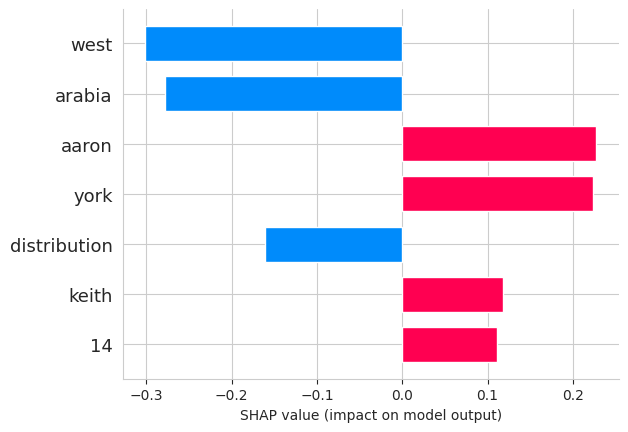

In [18]:
shap.initjs()
idx = 25
print("Correct:", "Christian" if y_test[idx] else "Atheist")
print("Classified:", "Christian" if y_pred[idx] else "Atheist")
print("----------------------")
print(newsgroups_test.data[idx])
shap.bar_plot(shap_values[idx,:], feature_names=vectorizer.get_feature_names_out())

# shap.force_plot(
#     explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
#     feature_names=vectorizer.get_feature_names_out()
#   )

Correct: Christian
Classified: Atheist
----------------------
From: biz@soil.princeton.edu (Dave Bisignano)
Subject: Re: Why do people become atheists?
Reply-To: biz@soil.princeton.edu
Organization: Princeton University
Lines: 10

Ken,
Then what happens when you die?
Why are you here?
What is the purpose of Your life, do you think it's 
just by chance you're in the family you are in and have the
friends you have?
Why do you think your searching?  To fill the void that
exists in your life.  Who do you think can fill that void

--Dave--



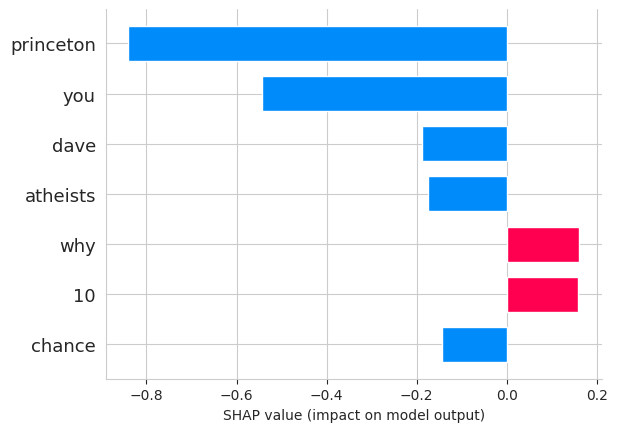

In [19]:
shap.initjs()
idx = 62
print("Correct:", "Christian" if y_test[idx] else "Atheist")
print("Classified:", "Christian" if y_pred[idx] else "Atheist")
print("----------------------")
print(newsgroups_test.data[idx])
shap.bar_plot(shap_values[idx,:], feature_names=vectorizer.get_feature_names_out())

# shap.force_plot(
#     explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
#     feature_names=vectorizer.get_feature_names_out()
#   )

### Part (C)


#### Part (i)

In [20]:
# Compute the accuracy of the classifier and the number of misclassified documents
accuracy = sklearn.metrics.accuracy_score(y_pred, y_test)
print("Accuarcy of Classifier:", {accuracy})
num_misclassified = np.sum(np.array(y_test) != np.array(y_pred))
print(f"Number of misclassified documents: {num_misclassified}")
np.mean(y_test)

Accuarcy of Classifier: {0.9218967921896792}
Number of misclassified documents: 56


np.float64(0.5550906555090656)

For a baseline, about 50% of the test data imply Christian documents.
Our model is pulling out meaningful structure!

#### Part (ii)

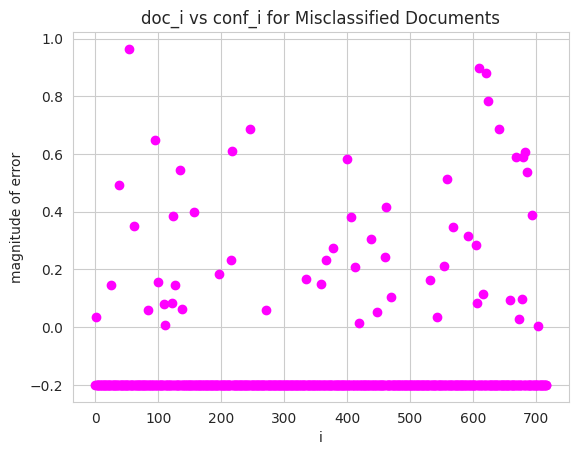

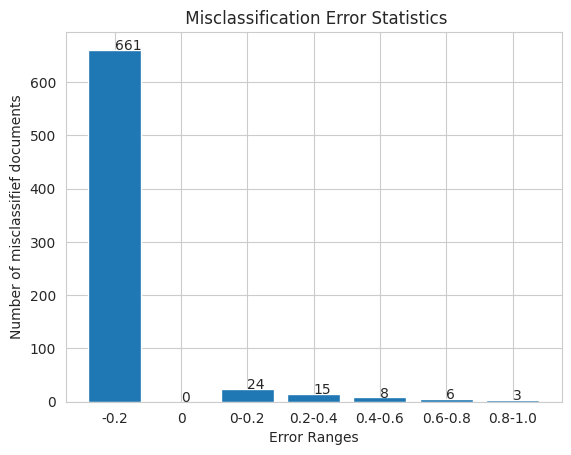

In [21]:
# Calculate conf_i for all misclassified documents
conf=[]
classify=[0]*7
y_pred_prob=model.predict_proba(X_test)
for i in range(y_pred.size):
  if y_test[i]!=y_pred[i]:
    error=round(float(y_pred_prob[i].max()-y_pred_prob[i].min()), 3)
  else :
    error=-0.2
  conf.append(error)
  if error==-0.2: classify[0]+=1
  elif error==0.0 : classify[1]+=1
  elif 0< error <= 0.2 : classify[2]+=1
  elif 0.2< error <=0.4 : classify[3]+=1
  elif 0.4< error <=0.6 : classify[4]+=1
  elif 0.6< error <=0.8 : classify[5]+=1
  elif 0.8< error <=1.0 : classify[6]+=1

# Plot conf_i
x=range(len(conf))
plt.scatter(x,conf, color="magenta")
plt.title("doc_i vs conf_i for Misclassified Documents")
plt.xlabel("i")
plt.ylabel("magnitude of error")
plt.show()

xlabels = ['-0.2', '0', '0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']
bars=plt.bar(xlabels, classify)
i=0
for bar in bars:
  height=bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, height, classify[i])
  i+=1
plt.title(" Misclassification Error Statistics")
plt.xlabel("Error Ranges")
plt.ylabel("Number of misclassifief documents")
plt.show()



#### Part (iii)

In [22]:
from collections import Counter

In [24]:
#@markdown #Calculating count_j and weight_j

feature_names=vectorizer.get_feature_names_out()
print(feature_names.size)
print(feature_names.argmax)
# # Explainer initialization (example for a linear model)
# explainer = shap.LinearExplainer(model, X_test)

# # SHAP values for all predictions
shap_values = explainer(X_test)

# Initialize counters
count_j=Counter() # Compute the number of documents (count_j) these words helped to misclassify
weight_j=Counter() # Compute the sum of absolute SHAP values (weight_j) for each word_j

count_j_neg = Counter()  # To count documents word_j helped misclassify
weight_j_neg = Counter()  # To store total weights for word_j
count_j_pos = Counter()  # To count documents word_j helped misclassify
weight_j_pos = Counter()  # To store total weights for word_j
# misclassify_contri=[]
for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:  # Misclassified document
        feature_indices = X_test[i].nonzero()[1]
        for j in feature_indices:
            shap_value=shap_values[i].values[j]
            if (y_pred[i] ==0 and shap_value < 0) :  # 0 -> neg , 1 -> pos
                # misclassify_contri.append(feature_names[j])
                count_j_neg[feature_names[j]] += 1
                weight_j_neg[feature_names[j]] += shap_value
                count_j[feature_names[j]] += 1
                weight_j[feature_names[j]] += abs(shap_value)
            elif (y_pred[i]==1 and shap_value >0):
                count_j_pos[feature_names[j]] += 1
                weight_j_pos[feature_names[j]] += shap_value
                count_j[feature_names[j]] += 1
                weight_j[feature_names[j]] += abs(shap_value)

# # Convert to sorted lists for visualization
# count_data = list(count_j.values())
# weight_data = list(weight_j.values())
# print("Words contributing positively to misclassification:")
# print(Counter(misclassify_contri))


2902
<built-in method argmax of numpy.ndarray object at 0x7e76ff78ecd0>


In [32]:
#Finding Common Words - played role in both positive and negative misclassification
print(len(count_j))
print(len(count_j_neg))
print(len(count_j_pos))
common_dict_count = {k: count_j_neg[k] + count_j_pos[k] for k in count_j_neg.keys() & count_j_pos.keys()}
print(len(common_dict_count))
common_dict_weight = {k: abs(weight_j_pos[k]) + abs(weight_j_neg[k]) for k in weight_j_neg.keys() & weight_j_pos.keys()}
print(len(common_dict_count))
list(common_dict_count.items())[:5]
list(common_dict_weight.items())[:5]



1252
358
967
73
73


[('it', np.float64(1.0212163988379315)),
 ('his', np.float64(0.4690593560522339)),
 ('other', np.float64(0.32992749715149106)),
 ('was', np.float64(0.41765470271273825)),
 ('an', np.float64(0.3971384274740607))]

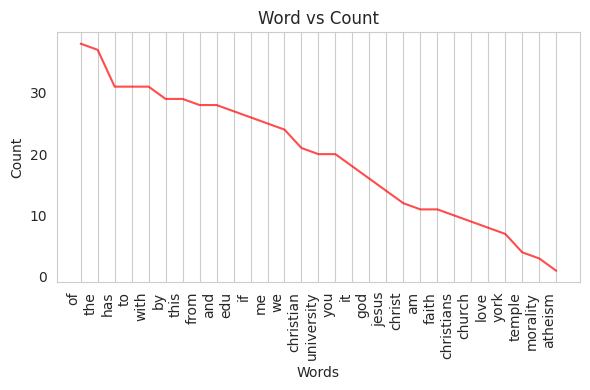

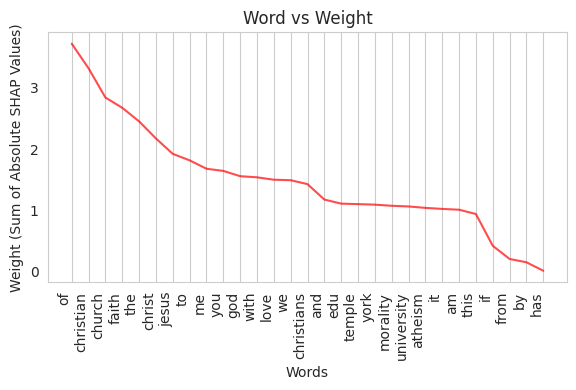

29


In [53]:
# Plot the distribution of count_j and weight_j


words= list(count_j.keys())
counts = list(count_j.values())
weights = list(weight_j.values())

words_t=[]
counts_t=[]
weights_t=[]

for i in range(len(counts)):
  if weights[i]>=1 or counts[i]>=25:
   words_t.append(words[i])
   counts_t.append(counts[i])
   weights_t.append(weights[i])

# Combine both lists and sort based on weighted_counts_t
sorted_data = sorted(zip(counts_t, words_t), key=lambda x: x[0], reverse=True)  # Sort in descending order

# Unpack sorted_data back into separate lists
counts_t_sorted, words_t_sorted = zip(*sorted_data)

# Convert tuples back into lists
counts_t_sorted = list(counts_t_sorted)
words_t_sorted = list(words_t_sorted)


# Plot Word vs Count
plt.figure(figsize=(6, 4))
plt.plot(words_t_sorted, counts_t_sorted, color='red', alpha=0.7)
plt.title('Word vs Count')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Combine both lists and sort based on weighted_counts_t
sorted_data = sorted(zip(weights_t, words_t), key=lambda x: x[0], reverse=True)  # Sort in descending order

# Unpack sorted_data back into separate lists
weights_t_sorted, words_t_sorted = zip(*sorted_data)

# Convert tuples back into lists
weights_t_sorted = list(weights_t_sorted)
words_t_sorted = list(words_t_sorted)

# Plot Word vs Weight
plt.figure(figsize=(6, 4))
plt.plot(words_t_sorted, weights_t_sorted, color='red', alpha=0.7)
plt.title('Word vs Weight')
plt.xlabel('Words')
plt.ylabel('Weight (Sum of Absolute SHAP Values)')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print(len(words_t_sorted))


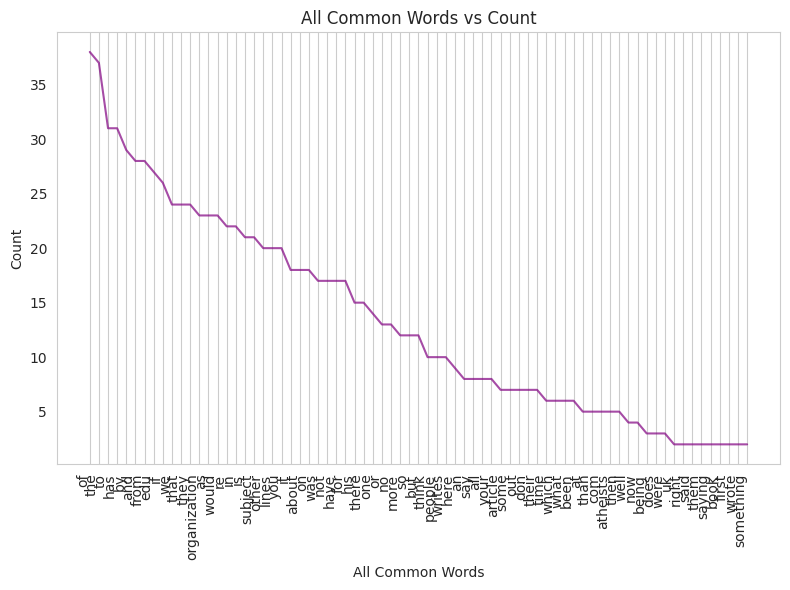

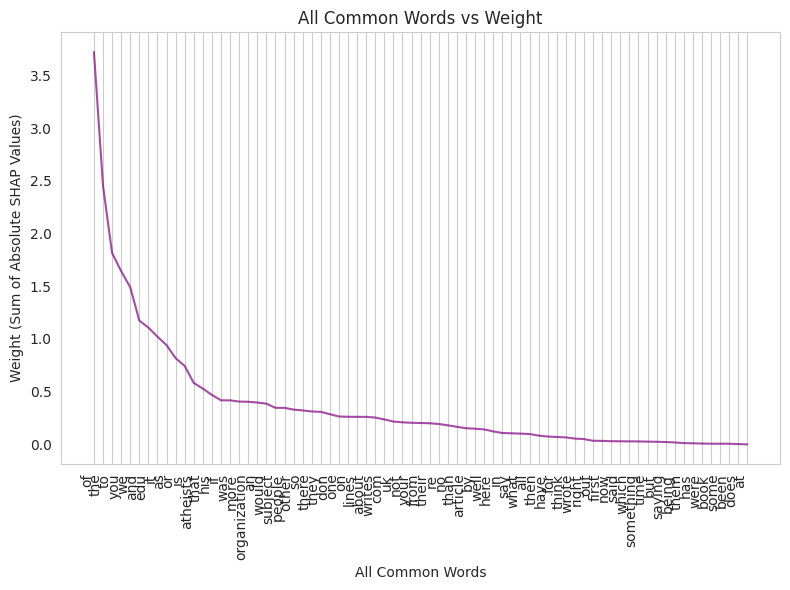

73


In [95]:
# Plot the distribution of common_dict_count and common_dict_weight


words= list(common_dict_count.keys())
counts = list(common_dict_count.values())
weights = list(common_dict_weight.values())
words_t=[]
counts_t=[]
weights_t=[]

for i in range(len(counts)):
  if weights[i]>=0 or counts[i]>=0:
   words_t.append(words[i])
   counts_t.append(counts[i])
   weights_t.append(weights[i])

# Combine both lists and sort based on weighted_counts_t
sorted_data = sorted(zip(counts_t, words_t), key=lambda x: x[0], reverse=True)  # Sort in descending order

# Unpack sorted_data back into separate lists
counts_t_sorted_common, words_t_sorted_common = zip(*sorted_data)

# Convert tuples back into lists
counts_t_sorted_common = list(counts_t_sorted_common)
words_t_sorted_common = list(words_t_sorted_common)


# Plot Word vs Count
plt.figure(figsize=(8, 6))
plt.plot(words_t_sorted_common, counts_t_sorted_common, color='purple', alpha=0.7)
plt.title('All Common Words vs Count')
plt.xlabel('All Common Words')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Combine both lists and sort based on weighted_counts_t
sorted_data = sorted(zip(weights_t, words_t), key=lambda x: x[0], reverse=True)  # Sort in descending order

# Unpack sorted_data back into separate lists
weights_t_sorted_common, words_t_sorted_common = zip(*sorted_data)

# Convert tuples back into lists
weights_t_sorted_common = list(weights_t_sorted_common)
words_t_sorted_common = list(words_t_sorted_common)

# Plot Word vs Weight
plt.figure(figsize=(8, 6))
plt.plot(words_t_sorted_common, weights_t_sorted_common, color='purple', alpha=0.7)
plt.title('All Common Words vs Weight')
plt.xlabel('All Common Words')
plt.ylabel('Weight (Sum of Absolute SHAP Values)')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print(len(words_t_sorted_common))


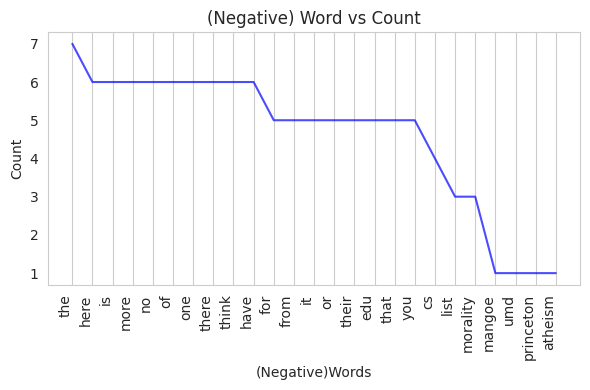

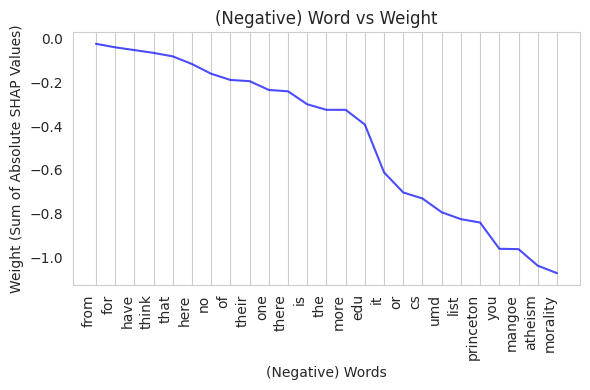

25


In [93]:
# Plot the distribution of count_j_neg and weight_j_neg


words= list(count_j_neg.keys())
counts = list(count_j_neg.values())
weights = list(weight_j_neg.values())

words_t=[]
counts_t=[]
weights_t=[]

for i in range(len(counts)):
  if counts[i]>=5 or weights[i]<=-0.7:
   words_t.append(words[i])
   counts_t.append(counts[i])
   weights_t.append(weights[i])



# Combine both lists and sort based on weighted_counts_t
sorted_data = sorted(zip(counts_t, words_t), key=lambda x: x[0], reverse=True)  # Sort in descending order

# Unpack sorted_data back into separate lists
counts_t_sorted, words_t_sorted = zip(*sorted_data)

# Convert tuples back into lists
counts_t_sorted = list(counts_t_sorted)
words_t_sorted = list(words_t_sorted)


# Plot Word vs Count
plt.figure(figsize=(6, 4))
plt.plot(words_t_sorted, counts_t_sorted, color='blue', alpha=0.7)
plt.title('(Negative) Word vs Count')
plt.xlabel('(Negative)Words')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Combine both lists and sort based on weighted_counts_t
sorted_data = sorted(zip(weights_t, words_t), key=lambda x: x[0], reverse=True)  # Sort in descending order

# Unpack sorted_data back into separate lists
weights_t_sorted, words_t_sorted = zip(*sorted_data)

# Convert tuples back into lists
weights_t_sorted = list(weights_t_sorted)
words_t_sorted = list(words_t_sorted)

# Plot Word vs Weight
plt.figure(figsize=(6, 4))
plt.plot(words_t_sorted, weights_t_sorted, color='blue', alpha=0.7)
plt.title('(Negative) Word vs Weight')
plt.xlabel('(Negative) Words')
plt.ylabel('Weight (Sum of Absolute SHAP Values)')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print(len(words_t_sorted))



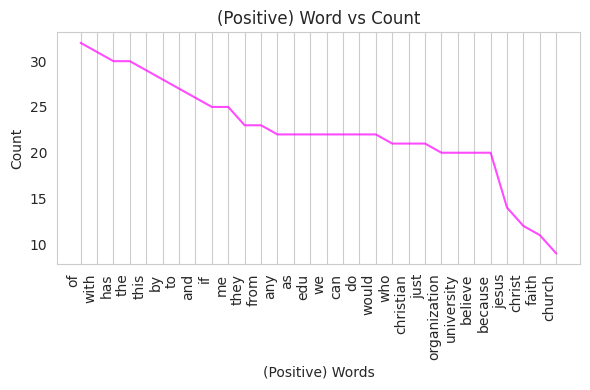

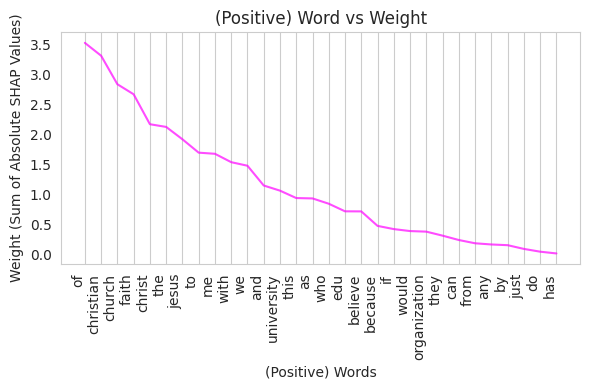

30


In [94]:
# Plot the distribution of count_j_pos and weight_j_pos


words= list(count_j_pos.keys())
counts = list(count_j_pos.values())
weights = list(weight_j_pos.values())

words_t=[]
counts_t=[]
weights_t=[]

for i in range(len(counts)):
  if counts[i]>=20 or weights[i]>=1.8:
   words_t.append(words[i])
   counts_t.append(counts[i])
   weights_t.append(weights[i])



# Combine both lists and sort based on weighted_counts_t
sorted_data = sorted(zip(counts_t, words_t), key=lambda x: x[0], reverse=True)  # Sort in descending order

# Unpack sorted_data back into separate lists
counts_t_sorted, words_t_sorted = zip(*sorted_data)

# Convert tuples back into lists
counts_t_sorted = list(counts_t_sorted)
words_t_sorted = list(words_t_sorted)


# Plot Word vs Count
plt.figure(figsize=(6, 4))
plt.plot(words_t_sorted, counts_t_sorted, color='magenta', alpha=0.7)
plt.title('(Positive) Word vs Count')
plt.xlabel('(Positive) Words')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Combine both lists and sort based on weighted_counts_t
sorted_data = sorted(zip(weights_t, words_t), key=lambda x: x[0], reverse=True)  # Sort in descending order

# Unpack sorted_data back into separate lists
weights_t_sorted, words_t_sorted = zip(*sorted_data)

# Convert tuples back into lists
weights_t_sorted = list(weights_t_sorted)
words_t_sorted = list(words_t_sorted)

# Plot Word vs Weight
plt.figure(figsize=(6, 4))
plt.plot(words_t_sorted, weights_t_sorted, color='magenta', alpha=0.7)
plt.title('(Positive) Word vs Weight')
plt.xlabel('(Positive) Words')
plt.ylabel('Weight (Sum of Absolute SHAP Values)')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print(len(words_t_sorted))



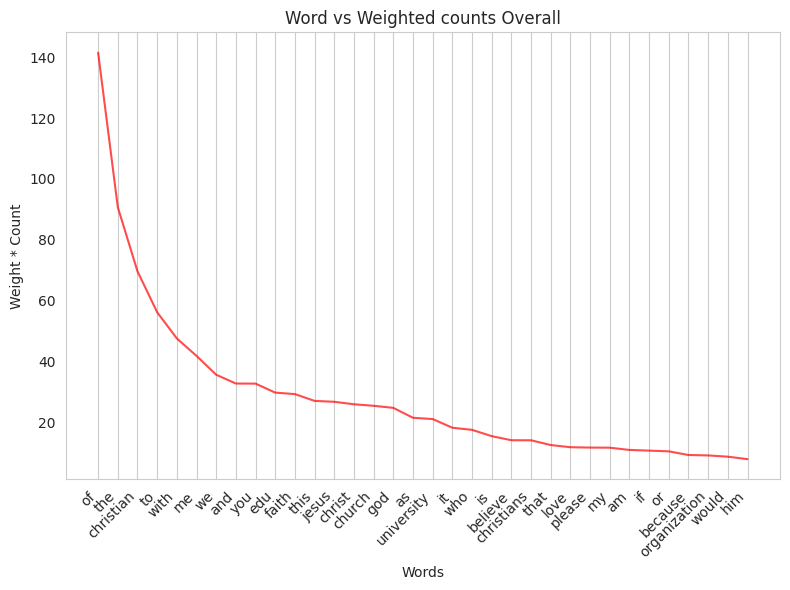

34

In [66]:

words= list(count_j.keys())
counts = list(count_j.values())
weights = list(weight_j.values())

weighted_counts=[weights[i]*counts[i] for i in range(len(weights))]
len(weighted_counts)

# weighted_counts_t
weighted_counts_t = []
weighted_words_t=[]

for i in range(len(weighted_counts)):
  if weighted_counts[i] >= 8:
    weighted_counts_t.append(weighted_counts[i])
    weighted_words_t.append(words[i])

# Combine both lists and sort based on weighted_counts_t
sorted_data = sorted(zip(weighted_counts_t, weighted_words_t), key=lambda x: x[0], reverse=True)  # Sort in descending order

# Unpack sorted_data back into separate lists
weighted_counts_t_sorted, weighted_words_t_sorted = zip(*sorted_data)

# Convert tuples back into lists
weighted_counts_t_sorted = list(weighted_counts_t_sorted)
weighted_words_t_sorted = list(weighted_words_t_sorted)

# Plot Word vs Weight
plt.figure(figsize=(8, 6))
plt.plot(weighted_words_t_sorted, weighted_counts_t_sorted, color='red', alpha=0.7)
plt.title('Word vs Weighted counts Overall')
plt.xlabel('Words')
plt.ylabel('Weight * Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

len(weighted_words_t_sorted)

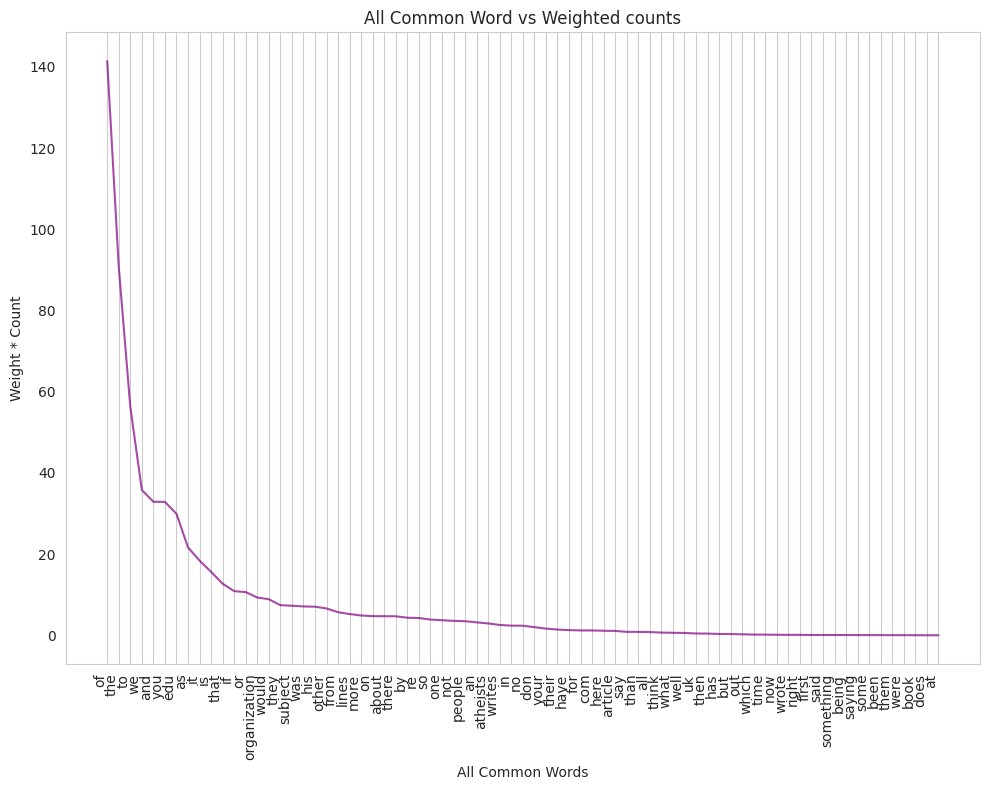

73

In [96]:

words= list(common_dict_count.keys())
counts = list(common_dict_count.values())
weights = list(common_dict_weight.values())

weighted_counts=[weights[i]*counts[i] for i in range(len(weights))]
len(weighted_counts)

# weighted_counts_t
weighted_counts_t = []
weighted_words_t=[]

for i in range(len(weighted_counts)):
  if weighted_counts[i] >= 0:
    weighted_counts_t.append(weighted_counts[i])
    weighted_words_t.append(words[i])

# Combine both lists and sort based on weighted_counts_t
sorted_data = sorted(zip(weighted_counts_t, weighted_words_t), key=lambda x: x[0], reverse=True)  # Sort in descending order

# Unpack sorted_data back into separate lists
weighted_counts_t_sorted_common, weighted_words_t_sorted_common = zip(*sorted_data)

# Convert tuples back into lists
weighted_counts_t_sorted_common = list(weighted_counts_t_sorted_common)
weighted_words_t_sorted_common = list(weighted_words_t_sorted_common)

# Plot Word vs Weight
plt.figure(figsize=(10,8))
plt.plot(weighted_words_t_sorted_common, weighted_counts_t_sorted_common, color='purple', alpha=0.7)
plt.title('All Common Word vs Weighted counts')
plt.xlabel('All Common Words')
plt.ylabel('Weight * Count')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

len(weighted_words_t_sorted_common)

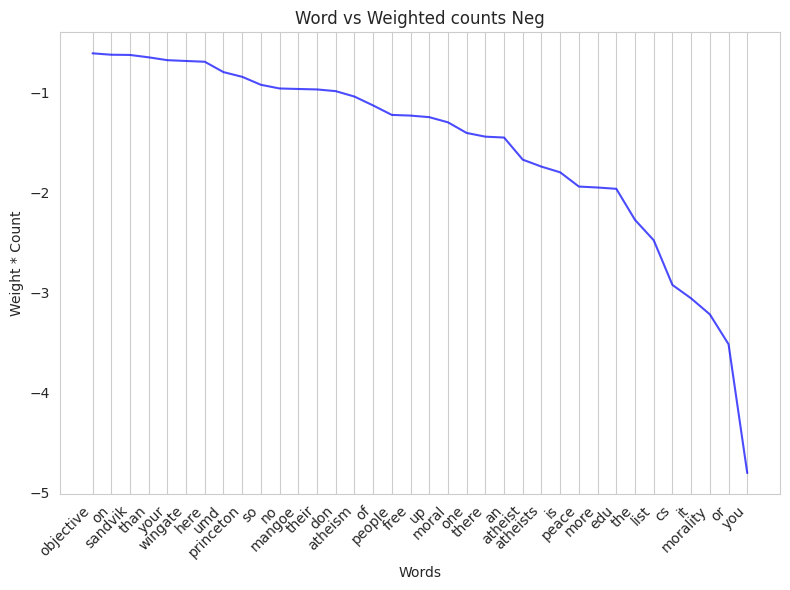

36

In [67]:
# Implement a strategy for feature selection


words= list(count_j_neg.keys())
counts = list(count_j_neg.values())
weights = list(weight_j_neg.values())

weighted_counts=[weights[i]*counts[i] for i in range(len(weights))]
len(weighted_counts)

# weighted_counts_t
weighted_counts_t = []
weighted_words_t=[]

for i in range(len(weighted_counts)):
  if weighted_counts[i] <= -0.6:
    weighted_counts_t.append(weighted_counts[i])
    weighted_words_t.append(words[i])

# Combine both lists and sort based on weighted_counts_t
sorted_data = sorted(zip(weighted_counts_t, weighted_words_t), key=lambda x: x[0], reverse=True)  # Sort in descending order

# Unpack sorted_data back into separate lists
weighted_counts_t_sorted, weighted_words_t_sorted = zip(*sorted_data)

# Convert tuples back into lists
weighted_counts_t_sorted_neg = list(weighted_counts_t_sorted)
weighted_words_t_sorted_neg = list(weighted_words_t_sorted)

# Plot Word vs Weight
plt.figure(figsize=(8,6))
plt.plot(weighted_words_t_sorted_neg, weighted_counts_t_sorted_neg, color='blue', alpha=0.7)
plt.title('Word vs Weighted counts Neg')
plt.xlabel('Words')
plt.ylabel('Weight * Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

len(weighted_words_t_sorted_neg)

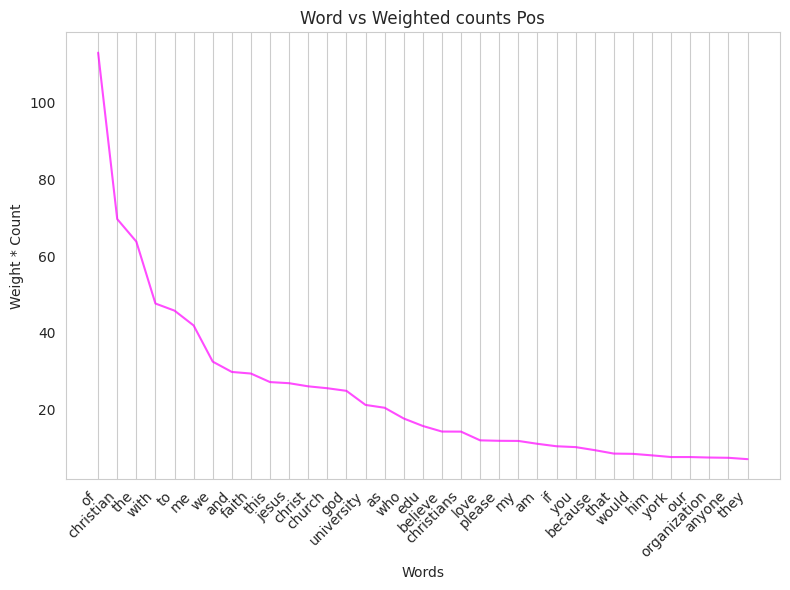

35

In [68]:
# Implement a strategy for feature selection

words= list(count_j_pos.keys())
counts = list(count_j_pos.values())
weights = list(weight_j_pos.values())

weighted_counts=[weights[i]*counts[i] for i in range(len(weights))]
len(weighted_counts)

# weighted_counts_t
weighted_counts_t = []
weighted_words_t=[]

for i in range(len(weighted_counts)):
  if weighted_counts[i] >= 7:
    weighted_counts_t.append(weighted_counts[i])
    weighted_words_t.append(words[i])

# Combine both lists and sort based on weighted_counts_t
sorted_data = sorted(zip(weighted_counts_t, weighted_words_t), key=lambda x: x[0], reverse=True)  # Sort in descending order

# Unpack sorted_data back into separate lists
weighted_counts_t_sorted, weighted_words_t_sorted = zip(*sorted_data)

# Convert tuples back into lists
weighted_counts_t_sorted_pos = list(weighted_counts_t_sorted)
weighted_words_t_sorted_pos = list(weighted_words_t_sorted)

# Plot Word vs Weight
plt.figure(figsize=(8, 6))
plt.plot(weighted_words_t_sorted_pos, weighted_counts_t_sorted_pos, color='magenta', alpha=0.7)
plt.title('Word vs Weighted counts Pos')
plt.xlabel('Words')
plt.ylabel('Weight * Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

len(weighted_words_t_sorted_pos)

### Part (D)

Word added: of
prev_ac = 0.9191073919107392 and accuracy = 0.9232914923291492
['of']
Word added: the
prev_ac = 0.9232914923291492 and accuracy = 0.9288702928870293
['of', 'the']
Word added: to
['of', 'the']
Word added: we
['of', 'the']
Word added: and
['of', 'the']
Word added: you
['of', 'the']
Word added: edu
prev_ac = 0.9288702928870293 and accuracy = 0.9316596931659693
['of', 'the', 'edu']
Word added: as
['of', 'the', 'edu']
Word added: it
['of', 'the', 'edu']
Word added: is
['of', 'the', 'edu']
Word added: that
['of', 'the', 'edu']
Word added: if
['of', 'the', 'edu']
Word added: or
['of', 'the', 'edu']
Word added: organization
['of', 'the', 'edu']
Word added: would
['of', 'the', 'edu']
Word added: they
['of', 'the', 'edu']
Word added: subject
['of', 'the', 'edu']
Word added: was
['of', 'the', 'edu']
Word added: his
['of', 'the', 'edu']
Word added: other
['of', 'the', 'edu']
Word added: from
['of', 'the', 'edu']
Word added: lines
['of', 'the', 'edu']
Word added: more
['of', 'the', '

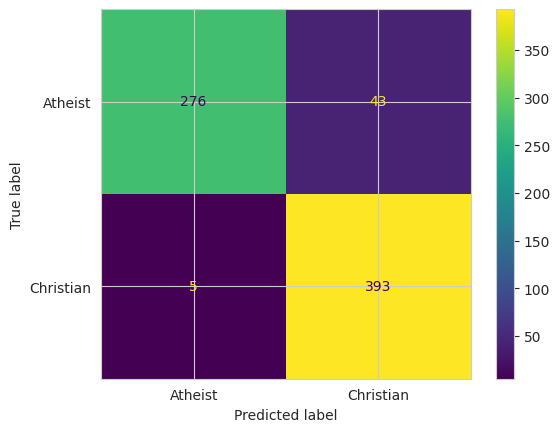

In [70]:
#############
##############
#@markdown #Trial 1: Using common words in negative and positive misclassification

custom_stop_words=[] #  49, 7

ignore_words= ['christian', 'faith', 'jesus', "christ", "church", "god", "believe", "christians", "atheism", "free", "atheist", "atheists", "beliefs"]

prev_ac=0.9191073919107392
prev_FP=47
prev_FN=9
i=0
y_pred3=[]
best_pred = None
best_conf_matrix = None
while (i<len(weighted_words_t_sorted_common)):
  word=weighted_words_t_sorted_common[i]
  if word.lower() in ignore_words:
          print(f"Skip {word}")
          i+=1
          continue
  # print(f"Word : {word}, Pos : {pos}, Neg : {neg}")
  print(f"Word added: {word}")
  custom_stop_words.append(word)


  vectorizer3=TfidfVectorizer(stop_words=custom_stop_words, min_df=10)
  # Transform the training and testing data
  X_train3 = vectorizer3.fit_transform(newsgroups_train.data)
  X_test3 = vectorizer3.transform(newsgroups_test.data)

  # Train and test a model
  model = SGDClassifier(penalty="l2", loss="log_loss", random_state=42)
  model.fit(X_train3, y_train)

  # Make predictions
  y_pred3 = model.predict(X_test3)
  cm=sklearn.metrics.confusion_matrix(y_true=y_test, y_pred=y_pred3)
  TN, FP, FN, TP = cm.ravel()
  ac = sklearn.metrics.accuracy_score(y_true=y_test, y_pred=y_pred3)

  if (ac > prev_ac) :
    print(f"prev_ac = {prev_ac} and accuracy = {ac}")
    prev_ac=ac
    prev_FP = FP
    prev_FN = FN
    best_pred = y_pred3.copy()
    best_conf_matrix = cm.copy()
  else: custom_stop_words.remove(word)

  print(custom_stop_words)
  i+=1
  if(i==len(weighted_words_t_sorted_common)):
    print(f"Final Words : {custom_stop_words}")
    print(f"Final Accuracy: {prev_ac}")
    print(f"Final FP : {prev_FP} and Final FN : {prev_FN}")
    print(i)
    # conf_matrix3
    disp3=sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=best_conf_matrix, display_labels=["Atheist", "Christian"])
    disp3.plot()

Word added: of
prev_ac = 0.9191073919107392 and accuracy = 0.9232914923291492
['of']
Skip christian
Word added: the
prev_ac = 0.9232914923291492 and accuracy = 0.9288702928870293
['of', 'the']
Word added: with
['of', 'the']
Word added: to
['of', 'the']
Word added: me
['of', 'the']
Word added: we
['of', 'the']
Word added: and
['of', 'the']
Skip faith
Word added: this
['of', 'the']
Skip jesus
Skip christ
Skip church
Skip god
Word added: university
['of', 'the']
Word added: as
['of', 'the']
Word added: who
['of', 'the']
Word added: edu
prev_ac = 0.9288702928870293 and accuracy = 0.9316596931659693
['of', 'the', 'edu']
Skip believe
Skip christians
Word added: love
['of', 'the', 'edu']
Word added: please
['of', 'the', 'edu']
Word added: my
['of', 'the', 'edu']
Word added: am
['of', 'the', 'edu']
Word added: if
['of', 'the', 'edu']
Word added: you
['of', 'the', 'edu']
Word added: because
['of', 'the', 'edu']
Word added: that
['of', 'the', 'edu']
Word added: would
['of', 'the', 'edu']
Word ad

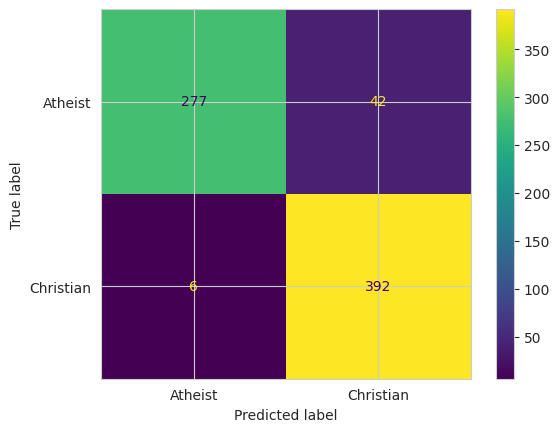

In [76]:
#@markdown #Trial 2: Overall - using all misclassification words


custom_stop_words=[] #  47, 9

ignore_words= ['christian', 'faith', 'jesus', "christ", "church", "god", "believe", "christians", "atheism", "free", "atheist", "atheists", "beliefs"]
i=0
prev_ac=0.9191073919107392
prev_FP=47
prev_FN=9
y_pred4=[]
best_pred = None
best_conf_matrix = None
while (i<len(weighted_words_t_sorted)):
  word=weighted_words_t_sorted[i]
  if word.lower() in ignore_words:
          print(f"Skip {word}")
          i+=1
          continue
  print(f"Word added: {word}")
  custom_stop_words.append(word)

  vectorizer4=TfidfVectorizer(stop_words=custom_stop_words, min_df=10)
  # Transform the training and testing data
  X_train4 = vectorizer4.fit_transform(newsgroups_train.data)
  X_test4 = vectorizer4.transform(newsgroups_test.data)


  # Train and test a model
  model = SGDClassifier(penalty="l2", loss="log_loss", random_state=42)
  model.fit(X_train4, y_train)

  # Make predictions
  y_pred4 = model.predict(X_test4)
  cm=sklearn.metrics.confusion_matrix(y_true=y_test, y_pred=y_pred4)
  TN, FP, FN, TP = cm.ravel()
  ac = sklearn.metrics.accuracy_score(y_true=y_test, y_pred=y_pred4)

  if (ac > prev_ac) :
    print(f"prev_ac = {prev_ac} and accuracy = {ac}")
    prev_ac=ac
    prev_FP = FP
    prev_FN = FN
    best_pred = y_pred4.copy()
    best_conf_matrix = cm.copy()
  else: custom_stop_words.remove(word)

  print(custom_stop_words)
  i+=1
  if(i==len(weighted_words_t_sorted)):
    print(f"Final Words : {custom_stop_words}")
    print(f"Final Accuracy: {prev_ac}")
    print(f"Final FP : {prev_FP} and Final FN : {prev_FN}")
    # conf_matrix3
    disp4=sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=best_conf_matrix, display_labels=["Atheist", "Christian"])
    disp4.plot()

Word : of, Pos : 1, Neg : 0
prev_ac = 0.9191073919107392 and accuracy = 0.9232914923291492
['of']
Skip christian
Word : the, Pos : 3, Neg : 0
prev_ac = 0.9232914923291492 and accuracy = 0.9288702928870293
['of', 'the']
Word : with, Pos : 4, Neg : 0
['of', 'the']
Word : to, Pos : 5, Neg : 0
['of', 'the']
Word : me, Pos : 6, Neg : 0
['of', 'the']
Word : we, Pos : 7, Neg : 0
['of', 'the']
Word : and, Pos : 8, Neg : 0
['of', 'the']
Skip faith
Word : this, Pos : 10, Neg : 0
['of', 'the']
Skip jesus
Skip christ
Skip church
Skip god
Word : university, Pos : 15, Neg : 0
['of', 'the']
Word : as, Pos : 16, Neg : 0
['of', 'the']
Word : who, Pos : 17, Neg : 0
['of', 'the']
Word : edu, Pos : 18, Neg : 0
prev_ac = 0.9288702928870293 and accuracy = 0.9316596931659693
['of', 'the', 'edu']
Skip believe
Skip christians
Word : love, Pos : 21, Neg : 0
['of', 'the', 'edu']
Word : please, Pos : 22, Neg : 0
['of', 'the', 'edu']
Word : my, Pos : 23, Neg : 0
['of', 'the', 'edu']
Word : am, Pos : 24, Neg : 0
['

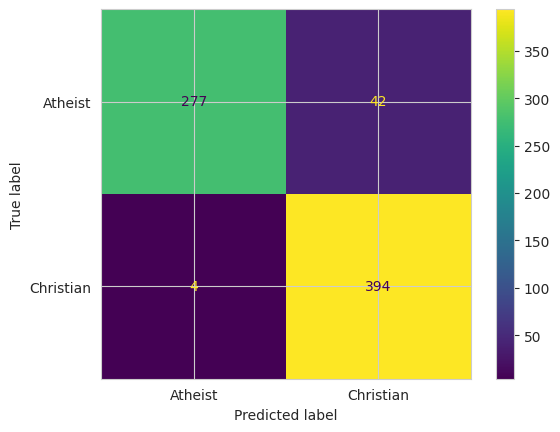

In [74]:
#@markdown Trial 3: using words Positive and Negative wise conditionally

custom_stop_words=[] #  49, 7
ignore_words= ['christian', 'faith', 'jesus', "christ", "church", "god", "believe", "christians", "atheism", "free", "atheist", "atheists", "beliefs"]
flag=0
force_flag=2
pos=0
neg=0
prev_ac=0.9191073919107392
prev_FP=47
prev_FN=9
l_iter_pos = iter(weighted_words_t_sorted_pos)
l_iter_neg = iter(weighted_words_t_sorted_neg)
y_pred5=[]
best_pred = None
best_conf_matrix = None

for i in range(len(weighted_words_t_sorted_pos)+ len(weighted_words_t_sorted_neg)):
  if ((force_flag==0 or flag==0) and pos<len(weighted_words_t_sorted_pos)) :
    word= next(l_iter_pos, "end_pos")
    pos+=1
    if word.lower() in ignore_words:
          print(f"Skip {word}")
          continue  # Skip without incrementing pos
  elif ((force_flag==1 or flag==1) and neg<len(weighted_words_t_sorted_neg)) :
    word = next(l_iter_neg, "end_neg")
    neg+=1
    if word.lower() in ignore_words:
          print(f"Skip {word}")
          continue  # Skip without incrementing pos
  if (pos >= len(weighted_words_t_sorted_pos)):
    force_flag=1
  if (neg >= len(weighted_words_t_sorted_neg)):
    force_flag=0
  if ( pos >= len(weighted_words_t_sorted_pos) and neg >= len(weighted_words_t_sorted_neg)):
    print(f"Final Words : {custom_stop_words}")
    print(f"Final Accuracy: {prev_ac}")
    print(f"Final FP : {prev_FP} and Final FN : {prev_FN}")
    # conf_matrix3
    disp3=sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=best_conf_matrix, display_labels=["Atheist", "Christian"])
    disp3.plot()
    break
  print(f"Word : {word}, Pos : {pos}, Neg : {neg}")
  custom_stop_words.append(word)


  vectorizer3=TfidfVectorizer(stop_words=custom_stop_words, min_df=10)
  # Transform the training and testing data
  X_train5 = vectorizer3.fit_transform(newsgroups_train.data)
  X_test5 = vectorizer3.transform(newsgroups_test.data)

  # Train and test a model
  model = SGDClassifier(penalty="l2", loss="log_loss", random_state=42)
  model.fit(X_train5, y_train)

  # Make predictions
  y_pred5 = model.predict(X_test5)
  cm=sklearn.metrics.confusion_matrix(y_true=y_test, y_pred=y_pred5)
  TN, FP, FN, TP = cm.ravel()
  ac = sklearn.metrics.accuracy_score(y_true=y_test, y_pred=y_pred5)

  if (ac > prev_ac) :
    print(f"prev_ac = {prev_ac} and accuracy = {ac}")
    if (FP > prev_FP and force_flag!=1) : flag=0
    elif (FN > prev_FN and force_flag!=0) : flag=1
    elif (force_flag!=1) : flag = 0
    elif (force_flag==1) : flag=1
    prev_ac=ac
    prev_FP = FP
    prev_FN = FN
    best_pred = y_pred5.copy()
    best_conf_matrix = cm.copy()
  else: custom_stop_words.remove(word)

  print(custom_stop_words)

In [97]:
#@markdown #Final Testing of Custom Words derived from the above Methods

custom_stop_words=['york', 'here', 'princeton', 'of', 'edu', 'the'] #  47, 9


vectorizer2=TfidfVectorizer(stop_words=custom_stop_words, min_df=10)
# Transform the training and testing data
X_train2 = vectorizer2.fit_transform(newsgroups_train.data)
X_test2 = vectorizer2.transform(newsgroups_test.data)

# # Target labels
# y_train = newsgroups_train.target
# y_test = newsgroups_test.target

# Train and test a model
model = SGDClassifier(penalty="l2", loss="log_loss", random_state=42)
model.fit(X_train2, y_train)

# Make predictions
y_pred2 = model.predict(X_test2)

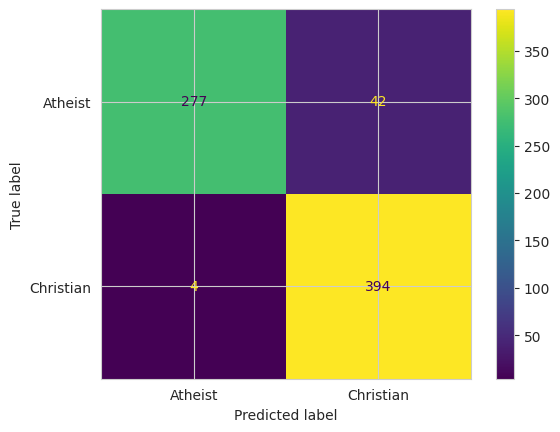

In [98]:
#@markdown #Final Confusion Matrix after feature selection
conf_matrix2=sklearn.metrics.confusion_matrix(y_test,y_pred2)
conf_matrix2
disp2=sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix2, display_labels=["Atheist", "Christian"])
disp2.plot()

In [99]:
#@markdown #Final accuracy of the classifier and the number of misclassified documents after feature selection
accuracy2 = sklearn.metrics.accuracy_score(y_pred2, y_test)
print("Accuarcy of Classifier:", {accuracy2})
num_misclassified2 = np.sum(np.array(y_test) != np.array(y_pred2))
print(f"Number of misclassified documents: {num_misclassified2}")
np.mean(y_test)

Accuarcy of Classifier: {0.9358437935843794}
Number of misclassified documents: 46


np.float64(0.5550906555090656)

<ipython-input-100-b8d336d42902>:6: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values2, X_test_array2, feature_names=vectorizer2.get_feature_names_out(), max_display=50)


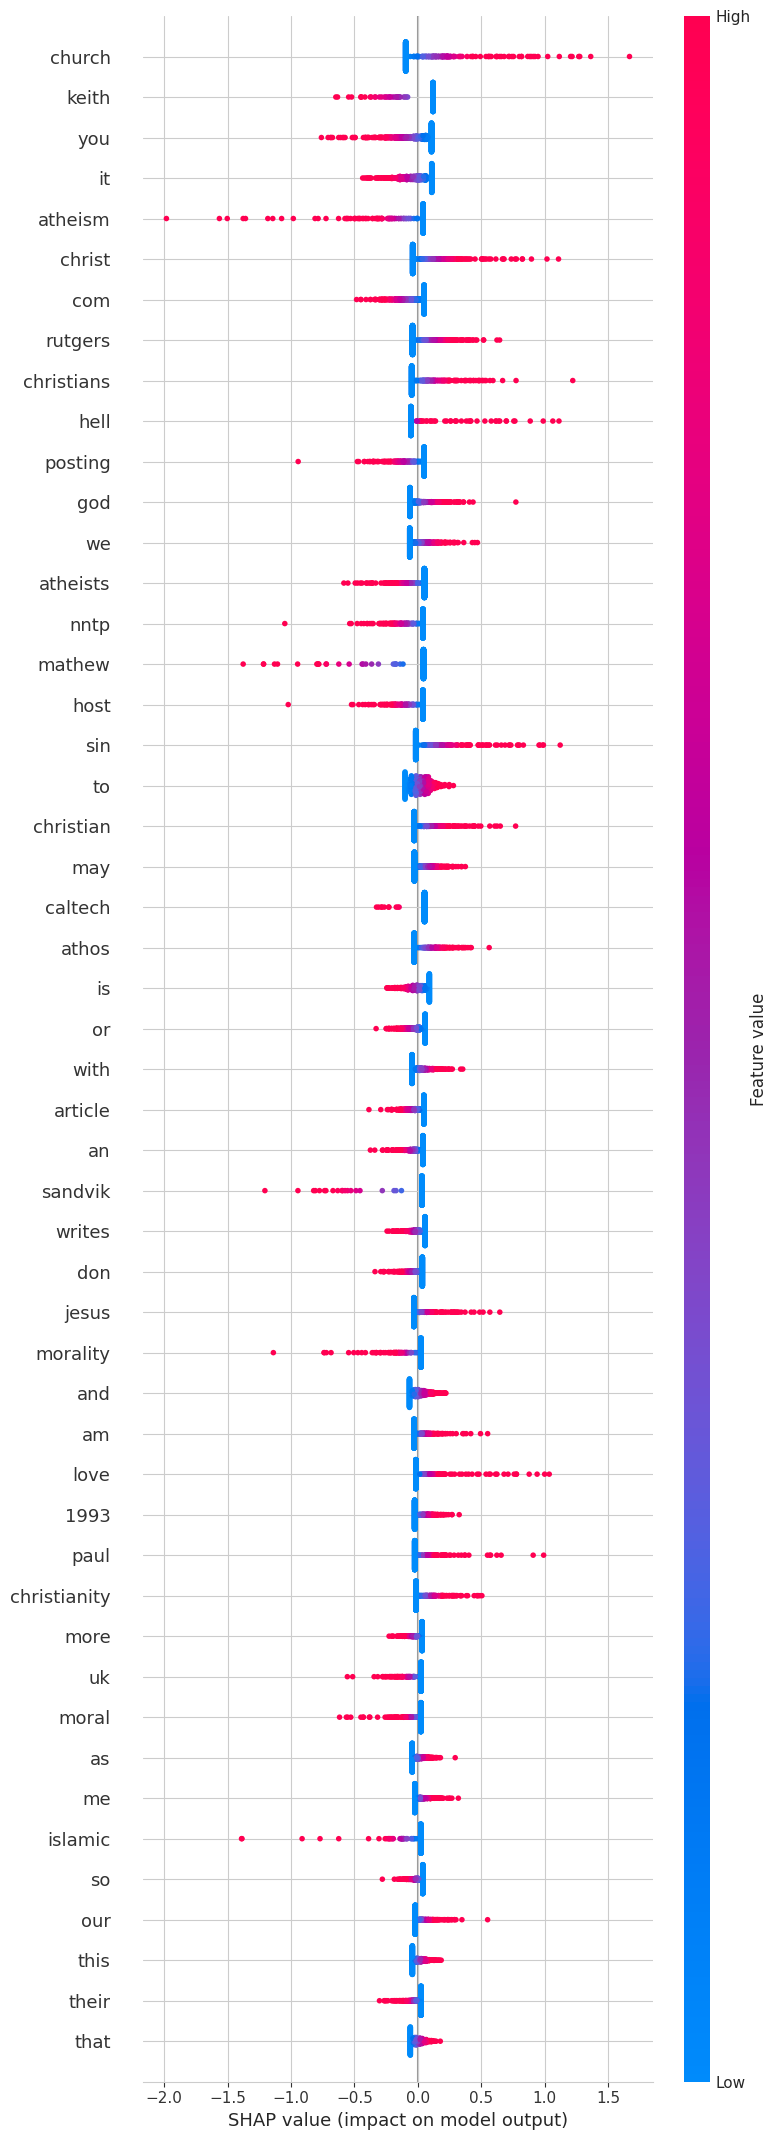

In [100]:
# Initialize the explainer and apply to test data
explainer = shap.LinearExplainer(model, X_train2)
# Apply it to the test data
shap_values2 = explainer.shap_values(X_test2)
X_test_array2 = X_test2.toarray() # We need to provide the data in dense format, not sparse
shap.summary_plot(shap_values2, X_test_array2, feature_names=vectorizer2.get_feature_names_out(), max_display=50)

In [101]:
# Identify at least one example that was misclassified before feature selection and that is classified correctly after feature selection

corrected_docs=[]

for i in range(len(y_test)):
  if ((y_test[i]!=y_pred[i]) and (y_test[i]==y_pred2[i])):
   corrected_docs.append(i)

print(len(corrected_docs))
corrected_docs

10


[1, 62, 109, 121, 137, 419, 447, 542, 606, 672]

Correct: Christian
Classified: Christian
----------------------
From: biz@soil.princeton.edu (Dave Bisignano)
Subject: Re: Why do people become atheists?
Reply-To: biz@soil.princeton.edu
Organization: Princeton University
Lines: 10

Ken,
Then what happens when you die?
Why are you here?
What is the purpose of Your life, do you think it's 
just by chance you're in the family you are in and have the
friends you have?
Why do you think your searching?  To fill the void that
exists in your life.  Who do you think can fill that void

--Dave--



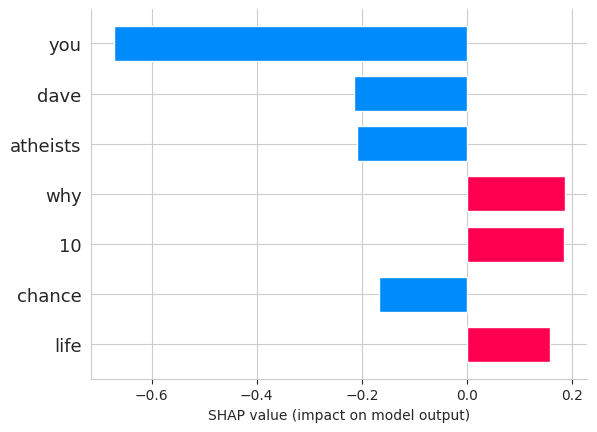

In [104]:
shap.initjs()
idx = 62
print("Correct:", "Christian" if y_test[idx] else "Atheist")
print("Classified:", "Christian" if y_pred2[idx] else "Atheist")
print("----------------------")
print(newsgroups_test.data[idx])
shap.bar_plot(shap_values2[idx,:], feature_names=vectorizer2.get_feature_names_out())